In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
covid = pd.read_csv('covid.csv')
covid.head()

,Date,Zone,New_Confirmed
0,2020-03-06,Calgary,1
1,2020-03-07,Calgary,1
2,2020-03-08,Calgary,1
3,2020-03-08,Edmonton,2
4,2020-03-09,Calgary,1


In [19]:
covid.columns

Index(['Date', 'Zone', 'New_Confirmed'], dtype='object')

In [20]:
covidzones = covid.groupby(['Zone'])
covidzones.count()

,Date,New_Confirmed
Zone,,
Calgary,18,18
Central,8,8
Edmonton,13,13
North,8,8
South,5,5
Unknown,2,2


In [31]:
EdmCumSum = covidzones['New_Confirmed'].get_group('Edmonton').cumsum()

In [32]:
EdmCumSum

3      2
6      5
8      7
13    13
15    14
17    19
22    26
26    29
31    37
36    52
42    57
46    62
51    77
Name: New_Confirmed, dtype: int64

In [95]:
edmcases = covidzones.get_group('Edmonton')
edmcases

,Date,New_Confirmed
3,2020-03-08,2
6,2020-03-10,3
8,2020-03-11,2
13,2020-03-14,6
15,2020-03-15,1
17,2020-03-16,5
22,2020-03-17,7
26,2020-03-18,3
31,2020-03-19,8
36,2020-03-20,15


In [96]:
edmcases['csum'] = edmcases['New_Confirmed'].cumsum()
edmcases['inc33'] = 2
edmcases['dtime'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [97]:
edmcases.reset_index(inplace=True, drop=True)
edmcases

,Date,New_Confirmed,csum,inc33,dtime
0,2020-03-08,2,2,2,0
1,2020-03-10,3,5,2,0
2,2020-03-11,2,7,2,0
3,2020-03-14,6,13,2,0
4,2020-03-15,1,14,2,0
5,2020-03-16,5,19,2,0
6,2020-03-17,7,26,2,0
7,2020-03-18,3,29,2,0
8,2020-03-19,8,37,2,0
9,2020-03-20,15,52,2,0


In [98]:
np.log(2)

0.6931471805599453

In [99]:
for idx in range(1, len(edmcases)):
    bidx = idx - 1
    increase33 = int(np.ceil(edmcases.loc[bidx, 'csum'] * 1.33))
    y = edmcases.loc[idx, 'csum']
    z = 2
    dtime = (idx * np.log(2) ) / ( np.log(y / z) )
    print(idx, increase33, dtime)
    edmcases.loc[idx, 'inc33'] = increase33
    edmcases.loc[idx, 'dtime'] = dtime
edmcases

1 3 0.75647079736603
2 7 1.1065895113302244
3 10 1.1109301866086894
4 18 1.4248287484320887
5 19 1.5394432231952109
6 26 1.6214289265639183
7 35 1.8144205502413393
8 39 1.9004842921700098
9 50 1.9147144819802684
10 70 2.06915530266382
11 76 2.2203399524030982
12 83 2.278429153579616


,Date,New_Confirmed,csum,inc33,dtime
0,2020-03-08,2,2,2,0.000000
1,2020-03-10,3,5,3,0.756471
2,2020-03-11,2,7,7,1.106590
3,2020-03-14,6,13,10,1.110930
4,2020-03-15,1,14,18,1.424829
5,2020-03-16,5,19,19,1.539443
6,2020-03-17,7,26,26,1.621429
7,2020-03-18,3,29,35,1.814421
8,2020-03-19,8,37,39,1.900484
9,2020-03-20,15,52,50,1.914714


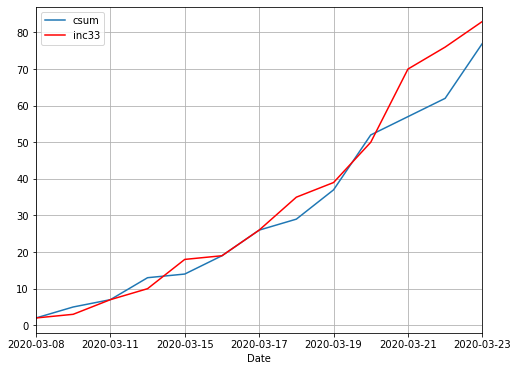

In [80]:
fig, ax = plt.subplots(figsize=(8,6))
edmcases.plot(y='csum', x='Date', ax=ax)
edmcases.plot(y='inc33', x='Date', ax=ax, c='red')
ax.grid(which='both')

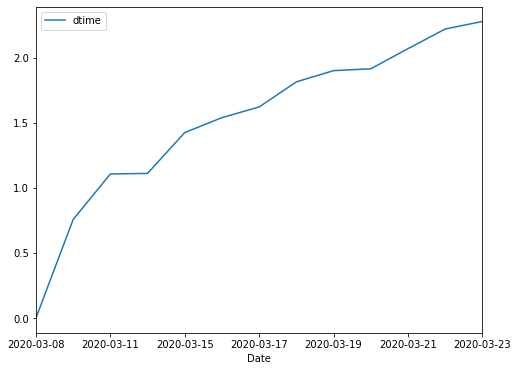

In [100]:
fig, ax = plt.subplots(figsize=(8,6))
edmcases.plot(y='dtime', x='Date', ax=ax)